# General strategy
Focus on blood, write the scripts in a way that can be generalizable to other systems

### 1. Select datasets

1. GSE162950: (elefanty) iPSC to HSC diff --> can be a very "young" blood age
2. GSE162950: single-cell transcriptome map of human hematopoietic tissues from 1st trimester to birth
3. GSE192740: CITE-seq data , Nuclei RNA-seq data and single cell RNA-seq data on CD45+ and CD45- cells isolated from the livers of mice fed a standard diet (SD) or western diet (WD; fat, cholesterol and sugar), from healthy and steatotic human livers, from hamster liver, pig liver, chicken liver, monkey liver and zebrafish liver
4. AIDA: 1,265,624 circulating immune cells from 619 donors, spanning 7 population groups across 5 Asian countries, and 6 controls
5. ainciburu 2023: enriched population of human HSPCs obtained from young and elderly healthy individuals.
6. hao 2021: integration of cite-seq data with scrna-seq, 211,000 human peripheral blood mononuclear cells (PBMCs) with panels extending to 228 antibodies
7. joung 2023: barcoded ORF library of 3,548 TF splice isoforms and developed a screening
platform to build a TF Atlas of >1 million cells (looks kinda bad)
8. liu 2022 (disco, heca): has blood and bone marrow available
9. ! lu 2022 weng: Heterogeneity and transcriptome changes of human CD8+ T cells across nine decades of life
10. mann 2018: Heterogeneous Responses of Hematopoietic Stem Cells to Inflammatory Stimuli Are Altered with Age
11. Sara Montserrat-Vazquez 2022: scRNA-seq of Lineage−(Cd11b−, Ter119−, Cd8−, Cd5−, B220−, Gr1−), C-kit+, Sca1+ BM cells (LSKs), which include all hematopoietic stem and progenitor cells in the BM (Supplementary Fig. 6a). A total of 15,856 LSK cells were obtained after the quality control and filtering (Supplementary Dataset 1), which divided into 13 clusters by using Seurat’s functions40 (Fig. 5a).
12. ! oetjen 2018: human bone marrow cells using both single-cell RNA sequencing and multiparameter flow cytometry from 20 healthy adult human donors across a broad age range
13. perez 2022: We profiled more than 1.2 million peripheral blood mononuclear cells (162 cases, 99 controls) with multiplexed single-cell RNA sequencing (mux-seq).
14. cheng, zhemin 2021: pan-cancer analysis of single myeloid cells from 210 patients across 15 human cancer types
15. terekhova 2023: Single-cell atlas of healthy human blood unveils age-related loss of NKG2C+GZMB-CD8+ memory T cells and accumulation of type 2 memory T cells

### 2. Download

In [3]:
import cellxgene_census

In [7]:
import os
import anndata as ad
import cellxgene_census

adata_path = "raw/adata_tabula_sapiens.h5ad"
os.makedirs("raw", exist_ok=True)

if os.path.exists(adata_path):
    print("Loading cached AnnData...")
    adata = ad.read_h5ad(adata_path)
else:
    with cellxgene_census.open_soma(census_version="2025-01-30") as census:
        adata = cellxgene_census.get_anndata(
            census=census,
            organism="Homo sapiens",
            obs_value_filter="dataset_id == '53d208b0-2cfd-4366-9866-c3c6114081bc'"
        )

        obs_keys = adata.obs.columns.tolist()
        var_keys = adata.var.columns.tolist()
        print(f"obs keys: {obs_keys}")
        print(f"var keys: {var_keys}")

    adata.write(adata_path)


obs keys: ['soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars']
var keys: ['soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs']


In [ ]:
# with cellxgene_census.open_soma() as census:
#     all_obs_keys = list(census["census_data"]["homo_sapiens"]["obs"].keys())
#     adata = cellxgene_census.get_anndata(
#         census=census,
#         organism="Homo sapiens",
#         obs_value_filter="dataset_id == '53d208b0-2cfd-4366-9866-c3c6114081bc'",
#         column_names={"obs": all_obs_keys},
#     )

In [8]:
# all blood-derived cell types (generated by chatgpt after being prompted with all adata["cell_type"].unique():

blood_derived = [
    "naive thymus-derived CD4-positive, alpha-beta T cell",
    "B cell",
    "CD8-positive, alpha-beta T cell",
    "CD4-positive, alpha-beta T cell",
    "plasma cell",
    "innate lymphoid cell",
    "natural killer cell",
    "erythrocyte",
    "myeloid dendritic cell",
    "CD8-positive, alpha-beta thymocyte",
    "myeloid cell",
    "macrophage",
    "non-classical monocyte",
    "classical monocyte",
    "T cell",
    "mature NK T cell",
    "regulatory T cell",
    "monocyte",
    "erythroid progenitor cell",
    "hematopoietic stem cell",
    "leukocyte",
    "activated CD4-positive, alpha-beta T cell",
    "mast cell",
    "granulocyte",
    "common myeloid progenitor",
    "thymocyte",
    "platelet",
    "tissue-resident macrophage",
    "basophil",
    "CD4-positive, alpha-beta thymocyte",
    "intermediate monocyte",
    "colon macrophage",
    "gamma-delta T cell",
    "erythroid lineage cell",
    "plasmacytoid dendritic cell",
    "T follicular helper cell",
    "activated CD8-positive, alpha-beta T cell",
    "hematopoietic precursor cell",
    "myeloid leukocyte",
    "naive thymus-derived CD8-positive, alpha-beta T cell",
    "hematopoietic cell"
]

adata_blood = adata[adata.obs["cell_type"].isin(blood_derived)].copy()



In [9]:
adata_blood

AnnData object with n_obs × n_vars = 516958 × 61888
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'

### 3. QC/filtration

In [ ]:
# adata = ad.read_h5ad(adata_path)

In [11]:
adata = adata_blood.copy()

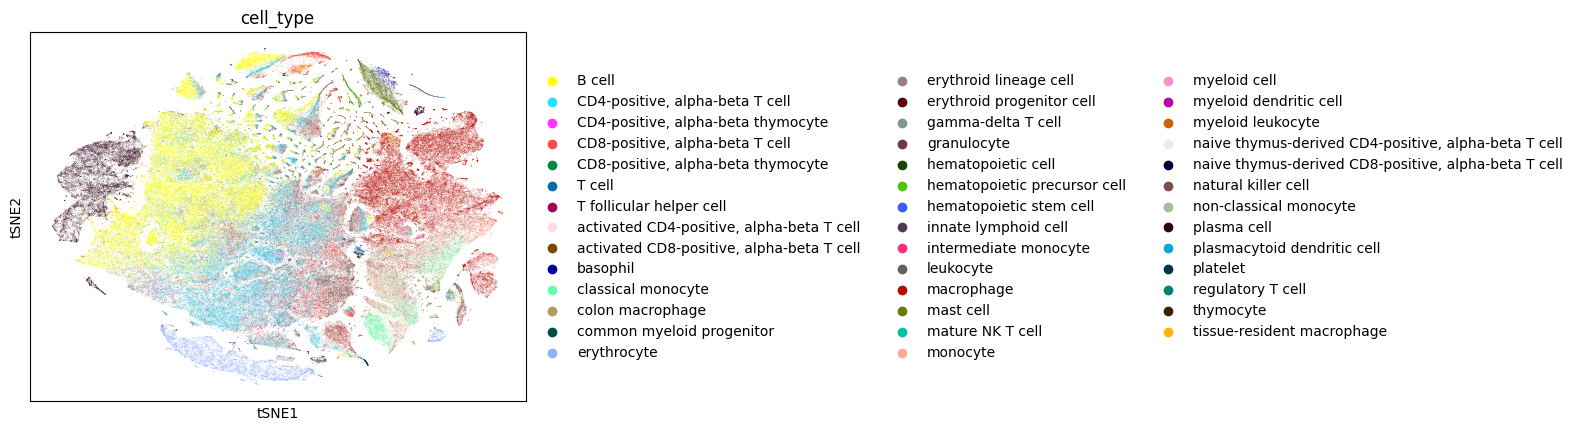

In [13]:
import scanpy as sc

sc.pp.calculate_qc_metrics(adata, inplace=True)

if adata.raw is None:
    adata.raw = adata.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)


sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

sc.pp.regress_out(adata, keys=['total_counts'])

sc.pp.scale(adata)

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.tsne(adata)

sc.pl.tsne(adata, color='cell_type')


In [27]:
sc.pl.tsne(adata, color='cell_type')

In [25]:
sc.pl.violin(
    adata,
    keys="total_counts",
    groupby="assay",
    rotation=90,
    stripplot=False,
    show=False,
    save="_umis_by_assay.png"
)


<Axes: ylabel='total_counts'>

In [20]:
import matplotlib
matplotlib.use("Agg")  # use non-interactive backend
import scanpy as sc
import matplotlib.pyplot as plt

sc.pl.tsne(adata, color='cell_type', show=False)
plt.savefig("tsne_plot.png")  # save manually


### 4. Integrate datasets

use this method? https://onlinelibrary.wiley.com/doi/10.15302/J-QB-022-0304  
or perhaps: https://pmc.ncbi.nlm.nih.gov/articles/PMC12013815/

ontology: simply use chatgpt to create some mappings

In [ ]:
from pathlib import Path

import pandas as pd
import scanpy as sc
import sctools as sct
from tqdm import tqdm

cellranger_ensembl2gene = sct.pp.get_cellranger_ensembl_to_gene()
cellranger_gene2ensembl = {g:e for e,g in cellranger_ensembl2gene.items()}

genes = pd.read_csv(Path(__file__).parent.parent / "data" / "10x_fixed_vocab.txt", header=None)[0].to_list()

adatas = [
    ('gs://retro-postprocessed/luo2022/luo2022_rmt.h5ad', 'cellbender'),
    ('gs://retro-postprocessed/hao2021/hao2021_rmt.h5ad', None),
    ('gs://retro-postprocessed/imyoo2023/imyoo2023_rmt.h5ad', 'cellbender'),
    ('gs://retro-postprocessed/tabula_sapiens/tabula_sapiens_blood_rmt.h5ad', 'decontX'),
    ('gs://retro-postprocessed/ren2021/ren2021_rmt.h5ad', None),
    ('gs://retro-postprocessed/aida2023/aida2023_rmt.h5ad', None),
    ('gs://retro-postprocessed/terekhova2023/terekhova2023_rmt.h5ad', None),
    # ('gs://retro-postprocessed/perez2022/perez2022_rmt.h5ad', 'cellbender'),
    # ('gs://retro-postprocessed/yazar2022/yazar2022_rmt.h5ad', 'cellbender'),
    # ('gs://retro-postprocessed/soskic2021/soskic2021_rmt.h5ad', None),
    # ('gs://retro-postprocessed/stephenson2021/stephenson2021_rmt.h5ad', None),
]

adata = None
subset_rmt = False
min_genes = 500
max_genes = 5000

for remote_path, layer in tqdm(adatas):
    adata_ = sct.io.read_adata(remote_path, overwrite=True)
    if layer is not None:
        adata_.X = adata_.layers[layer]
    if subset_rmt:
        print("Subsetting rmt")
        sct.tools.random_matrix.varm_subset(adata_)
        del adata_.varm
    del adata_.layers
    print("Concat")
    if adata is None:
        adata = adata_
    else:
        adata = sc.concat([adata, adata_], join='outer', index_unique='-')

adata.var.index.name = 'ensembl_gene_id'
adata.var['gene_symbol'] = adata.var.index.map(cellranger_ensembl2gene)

subset_min, _ = sc.pp.filter_cells(
    adata[:, list(set(adata.var_names.to_list()) & set(genes))], 
    min_genes=min_genes,
    inplace=False
)
subset_max, _ = sc.pp.filter_cells(
    adata[:, list(set(adata.var_names.to_list()) & set(genes))], 
    max_genes=max_genes,
    inplace=False
)

adata[subset_min & subset_max].write_h5ad('/data/rico/pbmc_concat_new.h5ad')

### 5. wholistic QC